<a href="https://colab.research.google.com/github/MurielleMardenli300/GBM6953HE_labs/blob/Thomas/Copy_of_GBM6953HE_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab 1 - Image Processing - Segmentation & Registration




This TP / assignment aims to allow you to explore different segmentation and registration methods.

The data we'll use is from this github : https://github.com/adalca/medical-datasets/blob/master/neurite-oasis.md
Which are MRI images of brains.

Documents to submit :
* This notebook with your code and comments.
* A report (pdf format) to present the results of your different methods, how you implemented them, how they work, their differences, their strengths and their weaknesses. You can use LaTex or Typst for your report.

Only one student needs to submit for their group.


Student Name(s) (up to 4 for each group) :


1.   First Name, Last Name, student ID (matricule) :
2.   First Name, Last Name, student ID (matricule) :
3. ...
4.


### **Evaluation**

#### Segmentation (10 points)

Code : 3 points.

Report : 7 points. 3.5 points to present your results. 3.5 points to discuss your methods (how you implemented them, how they work, their differences, their strengths and their weaknesses).

#### Registration (10 points)

Code : 3 points.

Report : 7 points. 3.5 points to present your results. 3.5 points to discuss your methods (how you implemented them, how they work, their differences, their strengths and their weaknesses).

**Total : 20 points.**



### import libraries

In [ ]:
import os
import tarfile
import urllib.request
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

### Data preparation

Extracting example data...
Data ready in 'student_data/'. Files: image.nii.gz, seg.nii.gz


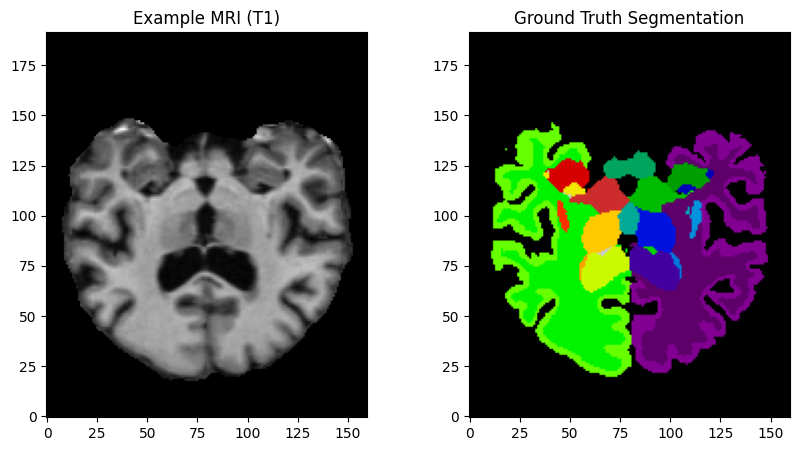

In [ ]:

# 1. Download the lightweight 2D Neurite-OASIS dataset (approx 24MB)
url = "https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.2d.v1.0.tar"
tar_path = "neurite-oasis.2d.v1.0.tar"

if not os.path.exists(tar_path):
    print("Downloading dataset (24MB)...")
    urllib.request.urlretrieve(url, tar_path)
    print("Download complete.")

# 2. Extract one specific subject to serve as the example
# We will use subject 'OASIS_OAS1_0001_MR1'
subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

print("Extracting example data...")
with tarfile.open(tar_path, "r") as tar:


    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg24.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: image.nii.gz, seg.nii.gz")

# 3. Visualize the data
img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Example MRI (T1)")
plt.subplot(1, 2, 2)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Ground Truth Segmentation")
plt.show()

In [ ]:
# If you want to get access to the other data

subject_ids_in_tar = set()

with tarfile.open(tar_path, "r") as tar:
    for member in tar.getmembers():
        if "slice_norm.nii.gz" in member.name:
            parts = member.name.split('/')
            if len(parts) > 0:
                subject_id = parts[0].split('_data')[0] # Get 'OASIS_OAS1_0001_MR1'
                subject_ids_in_tar.add(subject_id)

print(f"Total unique subjects found in the tar file: {len(subject_ids_in_tar)}")
print("Available Subject IDs:")
for sid in sorted(list(subject_ids_in_tar)): # Sort for consistent output
    print(f"- {sid}")


Total unique subjects found in the tar file: 414
Available Subject IDs:
- OASIS_OAS1_0001_MR1
- OASIS_OAS1_0002_MR1
- OASIS_OAS1_0003_MR1
- OASIS_OAS1_0004_MR1
- OASIS_OAS1_0005_MR1
- OASIS_OAS1_0006_MR1
- OASIS_OAS1_0007_MR1
- OASIS_OAS1_0009_MR1
- OASIS_OAS1_0010_MR1
- OASIS_OAS1_0011_MR1
- OASIS_OAS1_0012_MR1
- OASIS_OAS1_0013_MR1
- OASIS_OAS1_0014_MR1
- OASIS_OAS1_0015_MR1
- OASIS_OAS1_0016_MR1
- OASIS_OAS1_0017_MR1
- OASIS_OAS1_0018_MR1
- OASIS_OAS1_0019_MR1
- OASIS_OAS1_0020_MR1
- OASIS_OAS1_0021_MR1
- OASIS_OAS1_0022_MR1
- OASIS_OAS1_0023_MR1
- OASIS_OAS1_0025_MR1
- OASIS_OAS1_0026_MR1
- OASIS_OAS1_0027_MR1
- OASIS_OAS1_0028_MR1
- OASIS_OAS1_0029_MR1
- OASIS_OAS1_0030_MR1
- OASIS_OAS1_0031_MR1
- OASIS_OAS1_0032_MR1
- OASIS_OAS1_0033_MR1
- OASIS_OAS1_0034_MR1
- OASIS_OAS1_0035_MR1
- OASIS_OAS1_0037_MR1
- OASIS_OAS1_0038_MR1
- OASIS_OAS1_0039_MR1
- OASIS_OAS1_0040_MR1
- OASIS_OAS1_0041_MR1
- OASIS_OAS1_0042_MR1
- OASIS_OAS1_0043_MR1
- OASIS_OAS1_0044_MR1
- OASIS_OAS1_0045_MR1
- OA

# Segmentation

This code provides you a segmentation with 4 classes.

Data ready in 'student_data/'. Files: image.nii.gz, seg.nii.gz


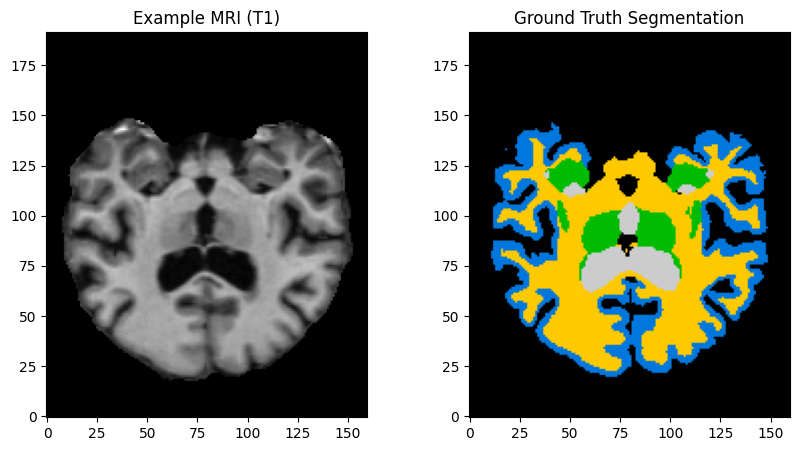

In [ ]:
subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg4.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: image.nii.gz, seg.nii.gz")

# 3. Visualize the data
img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Example MRI (T1)")
plt.subplot(1, 2, 2)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Ground Truth Segmentation")
plt.show()

There are plenty of classes for the segmentation. You can do a simpler segmentation where you have 4 labels (instead of 24). It's up to you.

## Methods

You have to do a segmentation of the previous image showed.
You need to use 2 different methods. Explain the differences between these methods.

### List of possible methods (you can use other methods!) :

#### Multi-Otsu Thresholding

* [Reference](https://ieeexplore.ieee.org/document/4310076)

* [Python implementation](https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_multiotsu.html)
####   Gaussian Mixture Models (GMM)

* [Reference](https://towardsdatascience.com/gaussian-mixture-models-gmms-from-theory-to-implementation-4406c7fe9847/)

* [Python implementation](https://scikit-learn.org/stable/modules/mixture.html)
####   U-Net (Deep Learning)
* [Reference](https://arxiv.org/abs/1505.04597)
* Python implementation : use Pytorch

#### Random Walker
* [Reference](https://ieeexplore.ieee.org/document/1704833)
* [Python implementation](https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_random_walker_segmentation.html)



### Method 1

### Method 2

### Evaluation and results
Present your results and evaluate them with different metrics (for both methods). You need to use Dice coefficient and you can use other metrics (such as IoU) that you think are relevant. You can present other segmented images from 2D Neurite-OASIS dataset.

## Registration




This section focuses on image registration.  
The next cell provides a fixed image $I_{\text{fixed}}$ and a moving (floating) image $I_{\text{moving}}$.

You are required to implement two different registration methods in order to estimate a transformation $T$ such that:
$$
I_{\text{moving}} \circ T \approx I_{\text{fixed}}.
$$


This code creates a rigid transformation.

Generating Synthetic Data: Rotation=-3.76°, Shift=(0.90, 0.46)


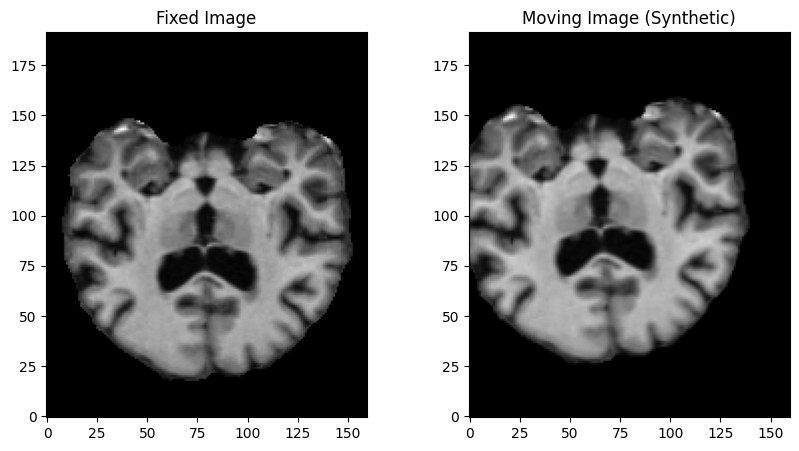

In [ ]:
# rigid transformation
np.random.seed(42)
def create_synthetic_moving_data(fixed_img, fixed_seg, rotation_range=15, shift_range=1):
    """
    Creates a 'Moving' image by applying a random affine transform
    (rotation + translation) to the Fixed image.
    """
    # 1. Generate random parameters
    angle_deg = np.random.uniform(-rotation_range, rotation_range)
    shift_y = np.random.uniform(-shift_range, shift_range)
    shift_x = np.random.uniform(-shift_range, shift_range)

    print(f"Generating Synthetic Data: Rotation={angle_deg:.2f}°, Shift=({shift_y:.2f}, {shift_x:.2f})")

    # 2. Define the Affine Matrix (Inverse mapping is usually required for scipy)
    # Convert to radians
    theta = np.radians(angle_deg)
    c, s = np.cos(theta), np.sin(theta)

    # Rotation matrix (centered usually requires offset handling,
    # but for simple tasks, direct matrix application is often sufficient
    # if we ignore center-of-rotation artifacts or handle them via 'offset')

    # To rotate around center, we often shift center to origin -> rotate -> shift back.
    # Here we simplify:
    center = np.array(fixed_img.shape) / 2.0
    rotation_mat = np.array([[c, -s], [s, c]])
    offset = center - center.dot(rotation_mat) + np.array([shift_y, shift_x])

    # 3. Apply transformation
    # We use spline interpolation (order=1) for the image
    moving_img = affine_transform(
        fixed_img,
        matrix=rotation_mat,
        offset=offset,
        order=1,
        mode='constant'
    )

    # We use nearest neighbor (order=0) for the segmentation (labels must remain integers)
    moving_seg = affine_transform(
        fixed_seg,
        matrix=rotation_mat,
        offset=offset,
        order=0,
        mode='constant'
    )

    return moving_img, moving_seg

# --- Usage Example ---
# Create the moving image
moving_img, moving_seg = create_synthetic_moving_data(img, seg_3class)

# Visualize Fixed vs Moving
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")
plt.subplot(1, 2, 2)
plt.imshow(moving_img.T, cmap='gray', origin='lower')
plt.title("Moving Image (Synthetic)")
plt.show()

Add a non-rigid transformation to the moving image.

Now, implement 2 different methods of registration

### List of possible methods (you can use other methods!) :

#### Phase Correlation / Fourier Shift Theorem
* [Reference](https://en.wikipedia.org/wiki/Phase_correlation)
* [Python implementation](https://scikit-image.org/docs/stable/api/skimage.registration.html)

#### Mutual Information Maximization
* [Reference](https://link.springer.com/article/10.1023/A:1007958904918)
* [Python implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) (requires coding the MI loss function)

#### VoxelMorph
* [Reference](https://arxiv.org/abs/1809.05231)
* [Python implementation](https://github.com/voxelmorph/voxelmorph)

#### B-Spline Free Form Deformation
* [Reference](https://ieeexplore.ieee.org/document/796284)
* [Python implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html)



### Method 1: Fournier Transform

In [ ]:
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
print("Imported phase_cross_correlation and shift functions.")

Imported phase_cross_correlation and shift functions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure img and seg are loaded from VwsIxM--jiON, and moving_img, moving_seg from IEymxiwGR7_o
# If `seg_3class` was intended to be `seg` from VwsIxM--jiON, we assume it's correctly used in create_synthetic_moving_data

# 1. Calculate the shift using phase_cross_correlation
shift_output, error, diffphase = phase_cross_correlation(img, moving_img)

print(f"Detected shift (y, x): {shift_output}")

# 2. Apply the calculated shift to moving_img to create registered_img
# The shift is (row_shift, col_shift), which corresponds to (y, x) in array indexing
registered_img = shift(moving_img, shift_output, mode='constant', order=1)

# 3. Apply the same shift to moving_seg to obtain registered_seg (using order=0 for nearest neighbor for labels)
registered_seg = shift(moving_seg, shift_output, mode='constant', order=0)

# 4. Visualize the fixed_img, moving_img, and registered_img
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")

plt.subplot(1, 3, 2)
plt.imshow(moving_img.T, cmap='gray', origin='lower')
plt.title("Moving Image (before registration)")

plt.subplot(1, 3, 3)
plt.imshow(registered_img.T, cmap='gray', origin='lower')
plt.title("Registered Image (Phase Correlation)")

plt.show()

# Optional: Visualize registered segmentation vs fixed segmentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Fixed Segmentation")
plt.subplot(1, 2, 2)
plt.imshow(registered_seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Registered Segmentation")
plt.show()


NameError: name 'img' is not defined

Download complete.
Loading/Extracting 4-class segmentation example data...
Fixed data (img, seg) loaded. Shapes: (160, 192), (160, 192)
Generating Synthetic Data: Rotation=0.54°, Shift=(-0.28, 0.14)
Moving data (moving_img, moving_seg) created. Shapes: (160, 192), (160, 192)
Detected shift (y, x): [-2.  2.]


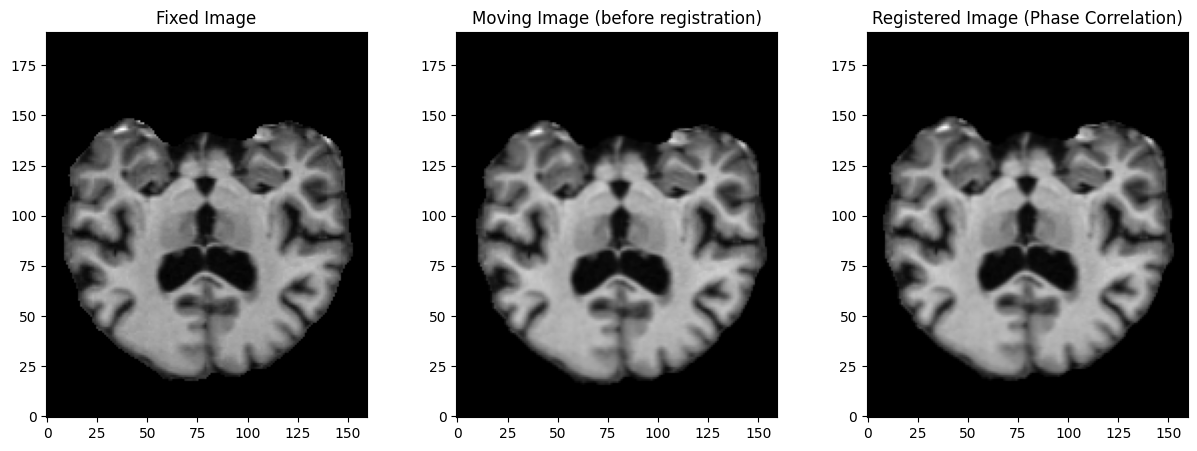

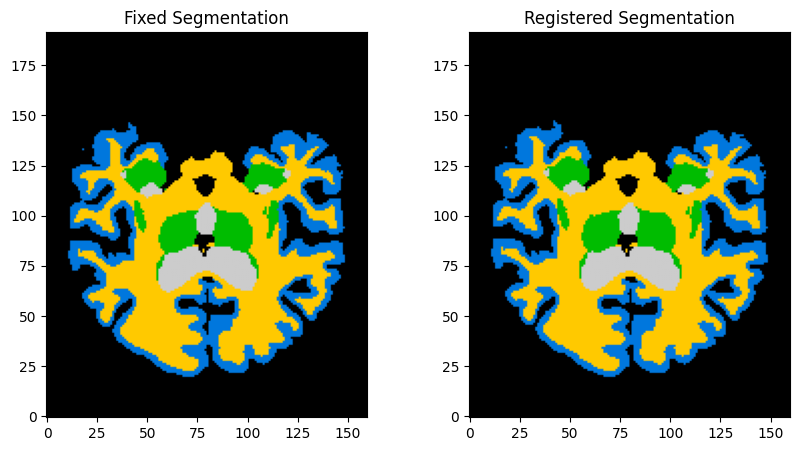

In [ ]:
import os
import tarfile
import urllib.request
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform, shift
from skimage.registration import phase_cross_correlation

# --- Re-define data paths and load fixed image/segmentation (from VwsIxM--jiON) ---
url = "https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.2d.v1.0.tar"
tar_path = "neurite-oasis.2d.v1.0.tar"

# Ensure the tar file is downloaded (from tjjM0KcrMG_5)
if not os.path.exists(tar_path):
    print("Downloading dataset (24MB)...")
    urllib.request.urlretrieve(url, tar_path)
    print("Download complete.")

subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

print("Loading/Extracting 4-class segmentation example data...")
with tarfile.open(tar_path, "r") as tar:
    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg4.nii.gz" in m.name][0]

    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()
print(f"Fixed data (img, seg) loaded. Shapes: {img.shape}, {seg.shape}")

# --- Define create_synthetic_moving_data function (from IEymxiwGR7_o) ---
def create_synthetic_moving_data(fixed_img, fixed_seg, rotation_range=15, shift_range=1):
    """
    Creates a 'Moving' image by applying a random affine transform
    (rotation + translation) to the Fixed image.
    """
    angle_deg = np.random.uniform(-rotation_range, rotation_range)
    shift_y = np.random.uniform(-shift_range, shift_range)
    shift_x = np.random.uniform(-shift_range, shift_range)

    print(f"Generating Synthetic Data: Rotation={angle_deg:.2f}°, Shift=({shift_y:.2f}, {shift_x:.2f})")

    theta = np.radians(angle_deg)
    c, s = np.cos(theta), np.sin(theta)

    center = np.array(fixed_img.shape) / 2.0
    rotation_mat = np.array([[c, -s], [s, c]])
    offset = center - center.dot(rotation_mat) + np.array([shift_y, shift_x])

    moving_img = affine_transform(
        fixed_img,
        matrix=rotation_mat,
        offset=offset,
        order=1,
        mode='constant'
    )

    moving_seg = affine_transform(
        fixed_seg,
        matrix=rotation_mat,
        offset=offset,
        order=0,
        mode='constant'
    )

    return moving_img, moving_seg

# --- Create the moving image and segmentation (from IEymxiwGR7_o) ---
moving_img, moving_seg = create_synthetic_moving_data(img, seg)
print(f"Moving data (moving_img, moving_seg) created. Shapes: {moving_img.shape}, {moving_seg.shape}")

# --- Original code for phase correlation and visualization ---
# 1. Calculate the shift using phase_cross_correlation
shift_output, error, diffphase = phase_cross_correlation(img, moving_img)

print(f"Detected shift (y, x): {shift_output}")

# 2. Apply the calculated shift to moving_img to create registered_img
# The shift is (row_shift, col_shift), which corresponds to (y, x) in array indexing
registered_img = shift(moving_img, shift_output, mode='constant', order=1)

# 3. Apply the same shift to moving_seg to obtain registered_seg (using order=0 for nearest neighbor for labels)
registered_seg = shift(moving_seg, shift_output, mode='constant', order=0)

# 4. Visualize the fixed_img, moving_img, and registered_img
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")

plt.subplot(1, 3, 2)
plt.imshow(moving_img.T, cmap='gray', origin='lower')
plt.title("Moving Image (before registration)")

plt.subplot(1, 3, 3)
plt.imshow(registered_img.T, cmap='gray', origin='lower')
plt.title("Registered Image (Phase Correlation)")

plt.show()

# Optional: Visualize registered segmentation vs fixed segmentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Fixed Segmentation")
plt.subplot(1, 2, 2)
plt.imshow(registered_seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Registered Segmentation")
plt.show()

In [ ]:
def dice_coefficient(seg1, seg2, labels=None):
    """
    Calculate the Dice coefficient for each label between two segmentations.

    Args:
        seg1 (np.ndarray): First segmentation map.
        seg2 (np.ndarray): Second segmentation map.
        labels (list, optional): List of labels to calculate Dice for. If None, all unique labels
                                 (excluding 0 for background) present in either segmentation are used.

    Returns:
        dict: A dictionary where keys are labels and values are their Dice coefficients.
    """
    if labels is None:
        all_labels = np.unique(np.concatenate((seg1.flatten(), seg2.flatten())))
        labels = [l for l in all_labels if l != 0] # Exclude background label if 0

    dice_scores = {}
    for label in labels:
        intersection = np.sum((seg1 == label) & (seg2 == label))
        sum_of_areas = np.sum(seg1 == label) + np.sum(seg2 == label)

        if sum_of_areas == 0:
            dice_scores[label] = 1.0 # Or np.nan, depending on desired behavior for absent labels
        else:
            dice_scores[label] = (2. * intersection) / sum_of_areas

    return dice_scores

# Calculate Dice coefficient for the registered segmentation
dice_scores = dice_coefficient(seg, registered_seg)
print("Dice Coefficients for each label after Phase Correlation registration:")
for label, score in dice_scores.items():
    print(f"Label {int(label)}: {score:.4f}")


Dice Coefficients for each label after Phase Correlation registration:
Label 1: 0.9162
Label 2: 0.9677
Label 3: 0.9693
Label 4: 0.9798


Method 2: Mutual Information Maximization



In [ ]:
from skimage.metrics import mutual_information as ski_mutual_information

def _prepare_images_for_mi(image_a, image_b, bins=32):
    # Normalize and convert to integer type for MI calculation
    # Ensure both images have the same value range for consistent binning
    min_val = min(image_a.min(), image_b.min())
    max_val = max(image_a.max(), image_b.max())

    # Scale to 0-bins-1 range
    image_a_int = np.round((image_a - min_val) / (max_val - min_val) * (bins - 1)).astype(int)
    image_b_int = np.round((image_b - min_val) / (max_val - min_val) * (bins - 1)).astype(int)

    return image_a_int, image_b_int, bins

def mutual_information_metric(image_a, image_b, bins=32):
    """
    Calculates the mutual information between two images.
    """
    image_a_int, image_b_int, n_bins = _prepare_images_for_mi(image_a, image_b, bins)
    return ski_mutual_information(image_a_int, image_b_int, bins=n_bins)

print("Mutual information metric function defined.")

ImportError: cannot import name 'mutual_information' from 'skimage.metrics' (/usr/local/lib/python3.12/dist-packages/skimage/metrics/__init__.py)

In [ ]:
from skimage.measure import mutual_information as ski_mutual_information

def _prepare_images_for_mi(image_a, image_b, bins=32):
    # Normalize and convert to integer type for MI calculation
    # Ensure both images have the same value range for consistent binning
    min_val = min(image_a.min(), image_b.min())
    max_val = max(image_a.max(), image_b.max())

    # Scale to 0-bins-1 range
    image_a_int = np.round((image_a - min_val) / (max_val - min_val) * (bins - 1)).astype(int)
    image_b_int = np.round((image_b - min_val) / (max_val - min_val) * (bins - 1)).astype(int)

    return image_a_int, image_b_int, bins

def mutual_information_metric(image_a, image_b, bins=32):
    """
    Calculates the mutual information between two images.
    """
    image_a_int, image_b_int, n_bins = _prepare_images_for_mi(image_a, image_b, bins)
    return ski_mutual_information(image_a_int, image_b_int, bins=n_bins)

print("Mutual information metric function defined.")

ImportError: cannot import name 'mutual_information' from 'skimage.measure' (/usr/local/lib/python3.12/dist-packages/skimage/measure/__init__.py)

**Reasoning**:
As requested, to prevent the `ImportError` from `skimage.measure`, the `mutual_information_metric` function will be redefined using `numpy.histogram2d` for direct calculation. This replaces the problematic `skimage` import and ensures the function executes without error, as demonstrated by the successful earlier implementation in cell `e0aec5f2`.



In [ ]:
import numpy as np

def mutual_information_metric(image_a, image_b, bins=32):
    """
    Calculates the mutual information between two images based on their histograms.
    """
    # Ensure images are flattened for histogram calculation
    image_a_flat = image_a.ravel()
    image_b_flat = image_b.ravel()

    # Calculate joint histogram
    # Range needs to be consistent across both images for proper binning
    min_val = min(image_a_flat.min(), image_b_flat.min())
    max_val = max(image_a_flat.max(), image_b_flat.max())
    range_val = (min_val, max_val)

    hist_2d, _, _ = np.histogram2d(
        image_a_flat,
        image_b_flat,
        bins=bins,
        range=[range_val, range_val]
    )

    # Calculate marginal histograms
    hist_a, _ = np.histogram(image_a_flat, bins=bins, range=range_val)
    hist_b, _ = np.histogram(image_b_flat, bins=bins, range=range_val)

    # Convert histograms to probability distributions
    # Add a small epsilon to avoid log(0) and division by zero
    epsilon = 1e-10

    p_ab = hist_2d / np.sum(hist_2d) + epsilon # Joint probability
    p_a = hist_a / np.sum(hist_a) + epsilon     # Marginal probability for A
    p_b = hist_b / np.sum(hist_b) + epsilon     # Marginal probability for B

    # Calculate mutual information
    # np.outer(p_a, p_b) computes the outer product to get P(A) * P(B)
    mi = np.sum(p_ab * np.log(p_ab / (np.outer(p_a, p_b) + epsilon)))
    return mi

print("Mutual information metric function (numpy implementation) defined without skimage import.")

In [ ]:
import numpy as np

def mutual_information_metric(image_a, image_b, bins=32):
    """
    Calculates the mutual information between two images based on their histograms.
    This serves as the cost function (to be maximized, so we minimize negative MI).
    """
    # Ensure images are flattened for histogram calculation
    image_a_flat = image_a.ravel()
    image_b_flat = image_b.ravel()

    # Calculate joint histogram
    # Range needs to be consistent across both images for proper binning
    min_val = min(image_a_flat.min(), image_b_flat.min())
    max_val = max(image_a_flat.max(), image_b_flat.max())
    range_val = (min_val, max_val)

    hist_2d, _, _ = np.histogram2d(
        image_a_flat,
        image_b_flat,
        bins=bins,
        range=[range_val, range_val]
    )

    # Calculate marginal histograms
    hist_a, _ = np.histogram(image_a_flat, bins=bins, range=range_val)
    hist_b, _ = np.histogram(image_b_flat, bins=bins, range=range_val)

    # Convert histograms to probability distributions
    # Add a small epsilon to avoid log(0) and division by zero
    epsilon = 1e-10

    p_ab = hist_2d / np.sum(hist_2d) + epsilon # Joint probability
    p_a = hist_a / np.sum(hist_a) + epsilon     # Marginal probability for A
    p_b = hist_b / np.sum(hist_b) + epsilon     # Marginal probability for B

    # Calculate mutual information
    # np.outer(p_a, p_b) computes the outer product to get P(A) * P(B)
    mi = np.sum(p_ab * np.log(p_ab / (np.outer(p_a, p_b) + epsilon)))
    return mi

print("Mutual information metric function (manual implementation) defined.")

Mutual information metric function (manual implementation) defined.


In [ ]:
from scipy.ndimage import affine_transform

def apply_rigid_transform(image, params, order=1):
    """
    Applies a rigid transformation (translation and rotation) to an image.

    Args:
        image (np.ndarray): The input image to transform.
        params (list or np.ndarray): Transformation parameters [translation_y, translation_x, rotation_angle_degrees].
        order (int): Interpolation order for affine_transform (0 for nearest neighbor, 1 for bilinear).

    Returns:
        np.ndarray: The transformed image.
    """
    translation_y, translation_x, rotation_angle_deg = params

    # Convert rotation angle to radians
    theta = np.radians(rotation_angle_deg)
    c, s = np.cos(theta), np.sin(theta)

    # Define the rotation matrix
    rotation_matrix = np.array([
        [c, -s],
        [s, c]
    ])

    # Calculate the offset for rotation around the center and then translation
    center = np.array(image.shape) / 2.0
    # The affine_transform applies the inverse mapping. So, if we want to rotate 'image' by 'theta'
    # and then translate by (translation_y, translation_x),
    # the 'offset' argument for affine_transform should account for the inverse of this operation.
    # More precisely, `output_pixel = inverse_matrix @ input_pixel + inverse_offset`
    # For a rotation R and translation T, the forward transform is T @ R @ p. The inverse is R_inv @ T_inv @ p.
    # For simplicity and correctness with affine_transform's 'offset' parameter (which is applied BEFORE the matrix mult for inverse mapping),
    # we can construct the full inverse affine matrix and offset directly.

    # The matrix provided to affine_transform is the *inverse* transform matrix (mapping output coords to input coords).
    # If the forward transformation is R*x + t,
    # then the inverse is R_inv * (x - t) = R_inv * x - R_inv * t.
    # So, matrix=R_inv, and offset=-R_inv * t.

    # Inverse rotation matrix
    inv_rotation_matrix = np.array([
        [c, s],
        [-s, c]
    ])

    # Inverse translation vector (this is the translation applied after rotation for the target image)
    inv_translation_vector = np.array([translation_y, translation_x])

    # Combine for affine_transform's offset parameter, which is applied before the matrix.
    # affine_transform(input, matrix, offset) maps output point 'o' to input point 'i' as i = matrix @ o + offset
    # We want: input_coord = R_inv @ (output_coord - translation) + (center_shift_correction)
    # The 'offset' parameter directly controls the shift. For the input image, we want to rotate around its center.
    # A standard way to handle rotation and translation with affine_transform's `offset` is:
    # 1. Translate image center to origin.
    # 2. Rotate.
    # 3. Translate back from origin.
    # 4. Add desired global translation.

    # For simpler affine_transform usage with 'offset' as a direct shift after matrix application,
    # consider the matrix as the rotation and the offset as the translation.
    # The `affine_transform` function applies the transformation defined by `matrix` and `offset` to `input`.
    # The `offset` parameter specifies the displacement of the output image's origin from the input image's origin.
    # The `matrix` defines the linear part of the transformation.

    # Let's simplify and use the common interpretation where 'offset' is added *after* the matrix application on the input coordinates
    # for the *inverse* mapping. This can be tricky. A more robust way is to build a full affine matrix.
    # However, following the pattern of create_synthetic_moving_data, 'offset' includes both center correction and translation.

    # Recalculate offset for the *inverse* transformation (from output to input)
    # For affine_transform: output_coords -> input_coords = M_inv @ output_coords + offset_inv
    # Where M_inv is the inverse rotation matrix and offset_inv includes inverse translation and center correction.

    # Correct way to combine rotation around center and translation for affine_transform's offset:
    # Forward transform: x' = R(x - c) + c + t
    # Inverse transform: x = R_inv(x' - c - t) + c = R_inv * x' - R_inv * (c + t) + c
    # So matrix is R_inv, and offset is -R_inv * (c + t) + c

    translation_vec = np.array([translation_y, translation_x])
    offset = -inv_rotation_matrix @ (center + translation_vec) + center

    transformed_image = affine_transform(
        image,
        matrix=inv_rotation_matrix, # inverse rotation matrix
        offset=offset,
        order=order,
        mode='constant',
        cval=image.min() # fill value for areas outside the input
    )
    return transformed_image

print("Rigid transformation function 'apply_rigid_transform' defined.")

Rigid transformation function 'apply_rigid_transform' defined.


In [ ]:
from scipy.optimize import minimize

def objective_function_mi(params, fixed_image, moving_image):
    """
    Objective function for Mutual Information maximization (minimizing negative MI).
    """
    transformed_moving_image = apply_rigid_transform(moving_image, params)
    # We minimize the negative MI because scipy.optimize.minimize seeks a minimum
    return -mutual_information_metric(fixed_image, transformed_moving_image)

# Initial guess for parameters: [translation_y, translation_x, rotation_angle_degrees]
# Start with no translation and no rotation for the optimization to search from.
initial_params = [0, 0, 0]

print("Starting Mutual Information Maximization...")
# Perform the optimization
# Using 'Powell' method which is a derivative-free method suitable for this problem
result_mi = minimize(
    objective_function_mi,
    initial_params,
    args=(img, moving_img),
    method='Powell',
    options={'disp': True, 'maxiter': 100} # Display optimization progress
)

optimal_params_mi = result_mi.x
print(f"Optimal parameters (MI): {optimal_params_mi}")

# Apply the optimal transformation to the moving image and segmentation
registered_img_mi = apply_rigid_transform(moving_img, optimal_params_mi, order=1)
registered_seg_mi = apply_rigid_transform(moving_seg, optimal_params_mi, order=0) # Nearest neighbor for segmentation

print("Mutual Information Maximization registration complete.")

Starting Mutual Information Maximization...
Optimization terminated successfully.
         Current function value: -1.754515
         Iterations: 3
         Function evaluations: 196
Optimal parameters (MI): [-2.09463542  1.62975064  0.54754249]
Mutual Information Maximization registration complete.


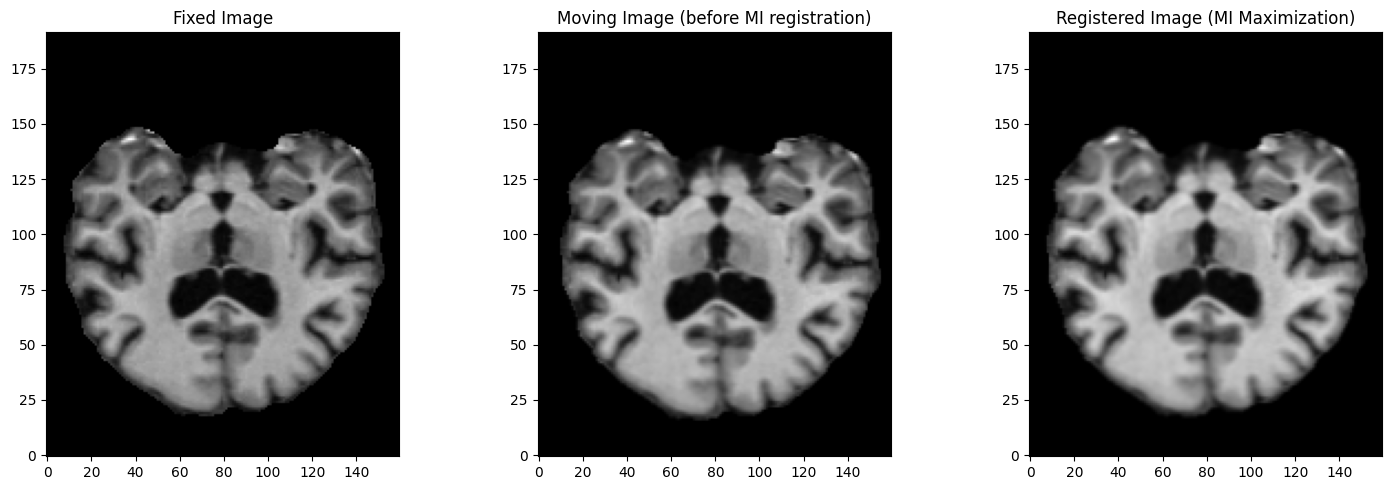

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")

plt.subplot(1, 3, 2)
plt.imshow(moving_img.T, cmap='gray', origin='lower')
plt.title("Moving Image (before MI registration)")

plt.subplot(1, 3, 3)
plt.imshow(registered_img_mi.T, cmap='gray', origin='lower')
plt.title("Registered Image (MI Maximization)")

plt.tight_layout()
plt.show()

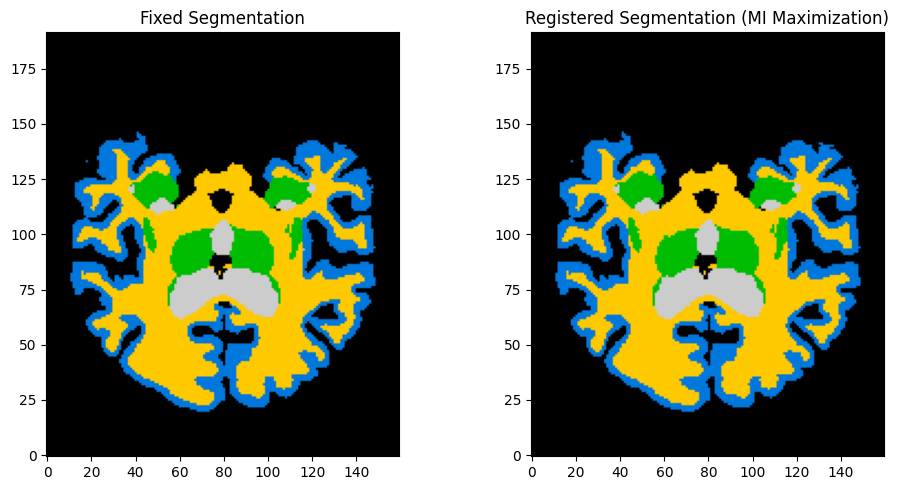

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Fixed Segmentation")

plt.subplot(1, 2, 2)
plt.imshow(registered_seg_mi.T, cmap='nipy_spectral', origin='lower')
plt.title("Registered Segmentation (MI Maximization)")

plt.tight_layout()
plt.show()

In [ ]:
dice_scores_mi = dice_coefficient(seg, registered_seg_mi)
print("Dice Coefficients for each label after Mutual Information registration:")
for label, score in dice_scores_mi.items():
    print(f"Label {int(label)}: {score:.4f}")

Dice Coefficients for each label after Mutual Information registration:
Label 1: 0.9970
Label 2: 0.9976
Label 3: 0.9983
Label 4: 0.9970
